In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터셋 로드
df = pd.read_csv("mtcars.csv")

In [3]:
print(df.head())

          Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  


In [4]:
print(df.tail())

        Unnamed: 0   mpg  cyl   disp   hp  drat     wt  qsec  vs  am  gear  \
27    Lotus Europa  30.4    4   95.1  113  3.77  1.513  16.9   1   1     5   
28  Ford Pantera L  15.8    8  351.0  264  4.22  3.170  14.5   0   1     5   
29    Ferrari Dino  19.7    6  145.0  175  3.62  2.770  15.5   0   1     5   
30   Maserati Bora  15.0    8  301.0  335  3.54  3.570  14.6   0   1     5   
31      Volvo 142E  21.4    4  121.0  109  4.11  2.780  18.6   1   1     4   

    carb  
27     2  
28     4  
29     6  
30     8  
31     2  


In [5]:
# 데이터의 개수 출력
print(df.shape)

(32, 12)


In [6]:
# 데이터셋 컬럼 출력
print(df.columns)

Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')


In [7]:
# 'Unnamed: 0' 컬럼명을 carname으로 수정, am 컬럼명을 transmission으로 수정
df = df.rename(columns = {"Unnamed: 0" : "carname", "am" : "transmission"})
print(df.columns)

Index(['carname', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'transmission', 'gear', 'carb'],
      dtype='object')


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carname       32 non-null     object 
 1   mpg           32 non-null     float64
 2   cyl           32 non-null     int64  
 3   disp          32 non-null     float64
 4   hp            32 non-null     int64  
 5   drat          32 non-null     float64
 6   wt            32 non-null     float64
 7   qsec          32 non-null     float64
 8   vs            32 non-null     int64  
 9   transmission  32 non-null     int64  
 10  gear          32 non-null     int64  
 11  carb          32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB
None


In [9]:
print(df.dtypes)

carname          object
mpg             float64
cyl               int64
disp            float64
hp                int64
drat            float64
wt              float64
qsec            float64
vs                int64
transmission      int64
gear              int64
carb              int64
dtype: object


In [10]:
print(df.describe())

             mpg        cyl        disp          hp       drat         wt  \
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500  230.721875  146.687500   3.596563   3.217250   
std     6.026948   1.785922  123.938694   68.562868   0.534679   0.978457   
min    10.400000   4.000000   71.100000   52.000000   2.760000   1.513000   
25%    15.425000   4.000000  120.825000   96.500000   3.080000   2.581250   
50%    19.200000   6.000000  196.300000  123.000000   3.695000   3.325000   
75%    22.800000   8.000000  326.000000  180.000000   3.920000   3.610000   
max    33.900000   8.000000  472.000000  335.000000   4.930000   5.424000   

            qsec         vs  transmission       gear     carb  
count  32.000000  32.000000     32.000000  32.000000  32.0000  
mean   17.848750   0.437500      0.406250   3.687500   2.8125  
std     1.786943   0.504016      0.498991   0.737804   1.6152  
min    14.500000   0.000000      0.000000   3.0000

In [11]:
# gear, transmission의 값 출력
print(df["gear"].unique())
print(df["transmission"].unique())

[4 3 5]
[1 0]


In [12]:
# gear과 transmission 경우의 수 조합별 출력
# 1) pandas.crosstab을 사용하는 방법
count_df1 = pd.crosstab(index=df["gear"], columns = df["transmission"])

# 2) pandas.crosstab을 사용하지 않는 방법
count_df2 = df.groupby(["gear", "transmission"]).size().reset_index(name = "count")

print(count_df1)
print(count_df2)

transmission   0  1
gear               
3             15  0
4              4  8
5              0  5
   gear  transmission  count
0     3             0     15
1     4             0      4
2     4             1      8
3     5             1      5


In [13]:
# 시각화 xlabel을 출력하기 쉽도록 label 컬럼 추가
count_df2['label'] = [f"({gear}, {transmission})" for gear, transmission in zip(count_df2["gear"], count_df2["transmission"])]
print(count_df2)

   gear  transmission  count   label
0     3             0     15  (3, 0)
1     4             0      4  (4, 0)
2     4             1      8  (4, 1)
3     5             1      5  (5, 1)


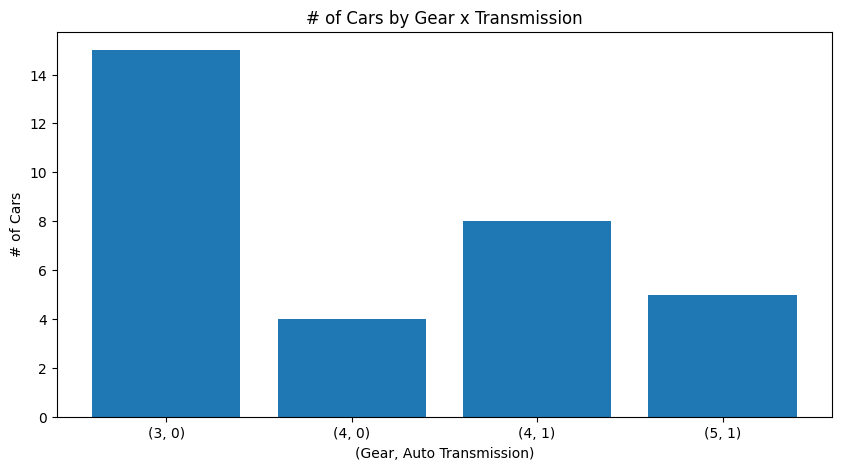

In [14]:
# 결과값을 바 그래프로 시각화
plt.figure(figsize = (10, 5))
plt.bar(count_df2["label"], count_df2["count"])
plt.title("# of Cars by Gear x Transmission")
plt.xlabel("(Gear, Auto Transmission)")
plt.ylabel("# of Cars")
plt.show()

In [15]:
df.columns[1:]

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'transmission',
       'gear', 'carb'],
      dtype='object')

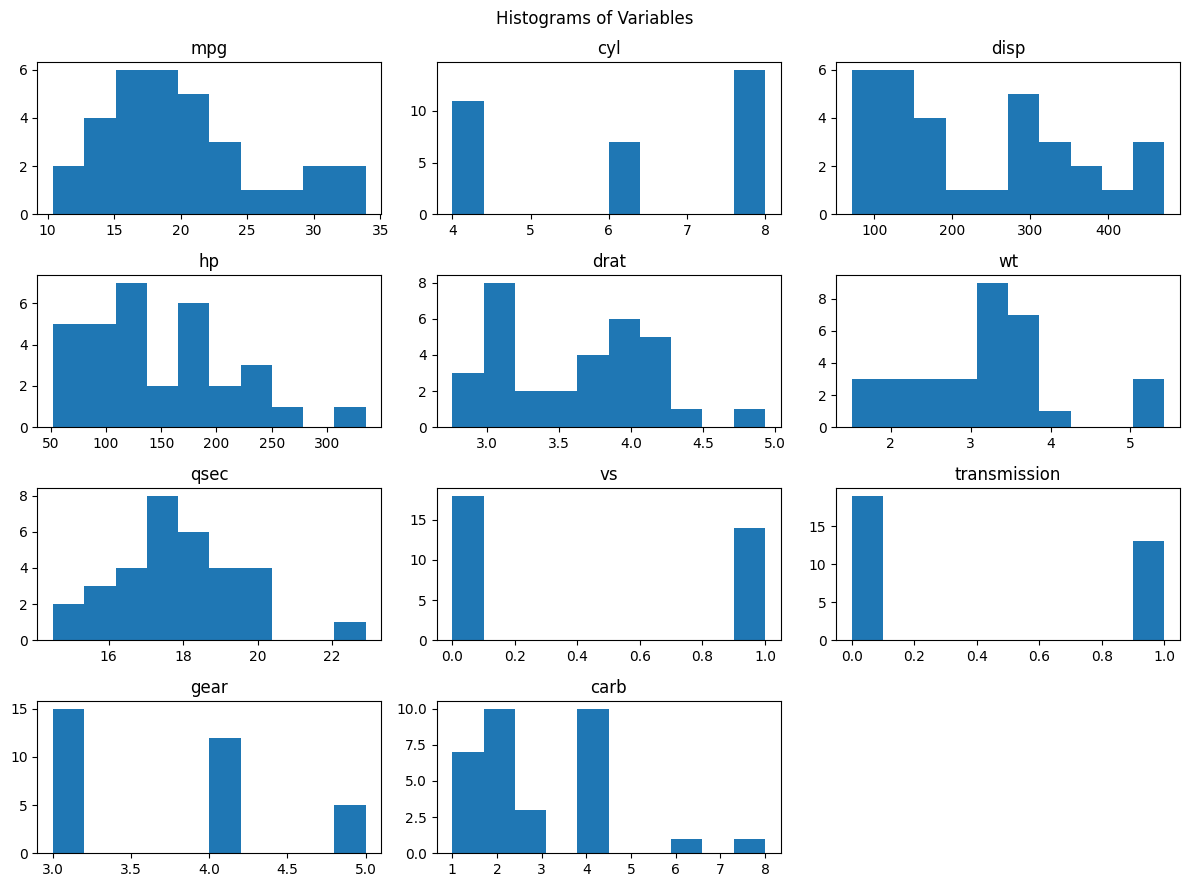

In [16]:
# 전체 히스토그램 시각화
plt.figure(figsize=(12, 9))

for i, col in enumerate(df.columns[1:], start = 1):
    plt.subplot(4, 3, i)
    plt.hist(df[col], bins = 10)
    plt.title(col)

plt.suptitle("Histograms of Variables")
plt.tight_layout()
plt.show()

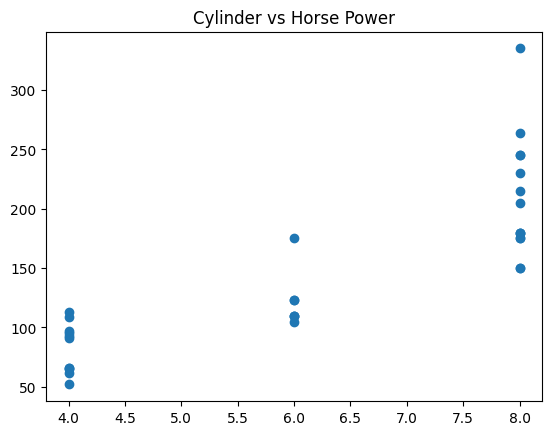

In [17]:
# Cylinder과 HorsePower간의 상관관계를 알아보기 위한 scatter plot

plt.scatter(df["cyl"], df["hp"])
plt.title("Cylinder vs Horse Power")
plt.show()

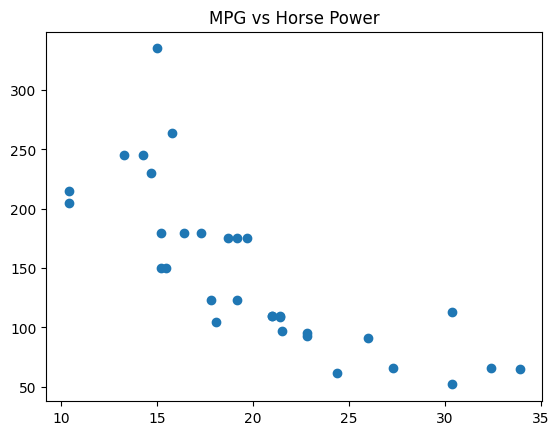

In [18]:
# MPG과 HorsePower간의 상관관계를 알아보기 위한 scatter plot

plt.scatter(df["mpg"], df["hp"])
plt.title("MPG vs Horse Power")
plt.show()

In [19]:
# 각 변수들 간의 상관관계를 알아보기 위해 상관계수를 구하는 표
corr_cols = df.columns[1:]

corr_df = df[corr_cols].corr()
print(corr_df)

                   mpg       cyl      disp        hp      drat        wt  \
mpg           1.000000 -0.852162 -0.847551 -0.776168  0.681172 -0.867659   
cyl          -0.852162  1.000000  0.902033  0.832447 -0.699938  0.782496   
disp         -0.847551  0.902033  1.000000  0.790949 -0.710214  0.887980   
hp           -0.776168  0.832447  0.790949  1.000000 -0.448759  0.658748   
drat          0.681172 -0.699938 -0.710214 -0.448759  1.000000 -0.712441   
wt           -0.867659  0.782496  0.887980  0.658748 -0.712441  1.000000   
qsec          0.418684 -0.591242 -0.433698 -0.708223  0.091205 -0.174716   
vs            0.664039 -0.810812 -0.710416 -0.723097  0.440278 -0.554916   
transmission  0.599832 -0.522607 -0.591227 -0.243204  0.712711 -0.692495   
gear          0.480285 -0.492687 -0.555569 -0.125704  0.699610 -0.583287   
carb         -0.550925  0.526988  0.394977  0.749812 -0.090790  0.427606   

                  qsec        vs  transmission      gear      carb  
mpg           0.41

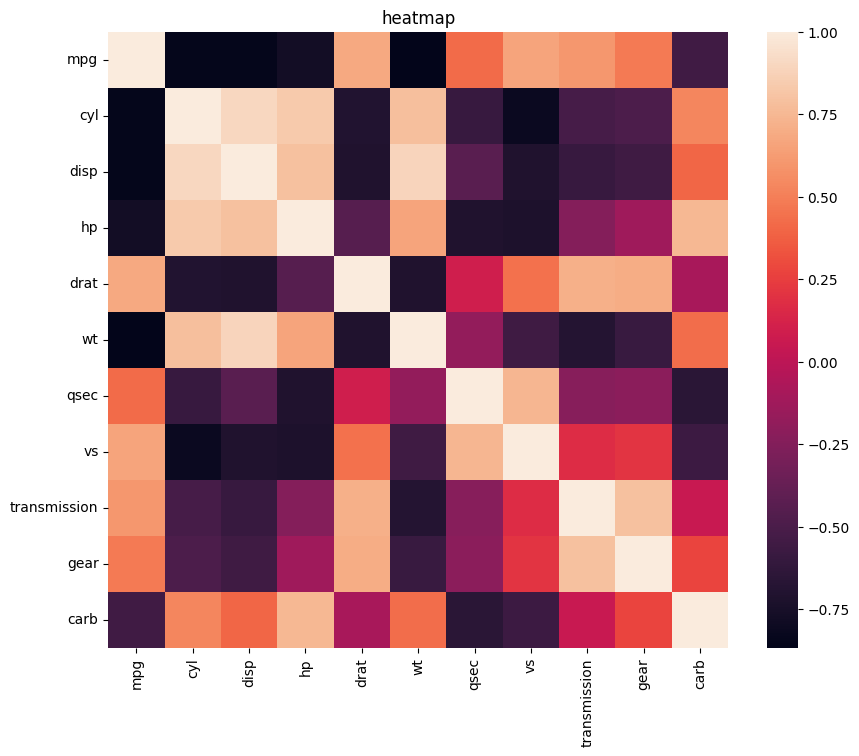

In [23]:
# 히트맵

plt.figure(figsize = (10, 8))
sns.heatmap(corr_df)
plt.title("heatmap")
plt.show()


In [21]:
df["carname"].value_counts

<bound method IndexOpsMixin.value_counts of 0               Mazda RX4
1           Mazda RX4 Wag
2              Datsun 710
3          Hornet 4 Drive
4       Hornet Sportabout
5                 Valiant
6              Duster 360
7               Merc 240D
8                Merc 230
9                Merc 280
10              Merc 280C
11             Merc 450SE
12             Merc 450SL
13            Merc 450SLC
14     Cadillac Fleetwood
15    Lincoln Continental
16      Chrysler Imperial
17               Fiat 128
18            Honda Civic
19         Toyota Corolla
20          Toyota Corona
21       Dodge Challenger
22            AMC Javelin
23             Camaro Z28
24       Pontiac Firebird
25              Fiat X1-9
26          Porsche 914-2
27           Lotus Europa
28         Ford Pantera L
29           Ferrari Dino
30          Maserati Bora
31             Volvo 142E
Name: carname, dtype: object>

# 비즈니스 활용 방안

## 1. 차량 개발 과정에서 비용을 크게 절감할 수 있다. 
 자동차 개발은 크게 디자인, 엔지니어링, 테스트, 제조공정, 주행테스트 단계를 거쳐 판매로 이어지게 되며, 개발 기간과 비용에 있어 천문학적인 투자를 필요로 한다. 이러한 각각의 과정에서 데이터 분석을 통해 투자 비용을 크게 절감할 수 있다.

1. 선행 개발 및 시장 분석
    - 이 과정에서는 소비자들의 니즈와 투자 비용을 고려하여 신차에 대한 컨셉이 정해진다.
    - 경쟁 차종의 데이터 (ex: Honda vs Toyota)와 기존 판매 데이터를 함께 고려하여 소비자군별 선호도를 정량화할 수 있다.
    - 이때 타켓 소비자군의 니즈에 최대한 부합하도록 불필요한 사양 등을 제거하여 부품 단가와 개발 기간을 크게 줄일 수 있다. 또한 잘못된 컨셉으로 인한 재개발/재설계 리스크를 절감할 수 있다.
    
2. 부품 최적화
    - 이 과정에서는 차량에 들어갈 부품을 설계한다.
    - 연비와 마력간의 trade-off가 존재하기 때문에, 목표 소비자군에 따른 최적의 설계가 필수적이다.
    - 이때 부품과 연비, 마력간의 상관관계를 데이터 기반으로 분석하여 신차의 컨셉에 최적으로 부합하는 부품의 조합을 설계할 수 있다.
    - 즉, 시뮬레이션 기반으로 수천가지의 부품 조합을 실제로 테스트해보지 않아도 소비자 만족과 기술적 제약 내에서 최적의 조합을 도출할 수 있기 때문에 테스트 비용을 크게 줄일 수 있다.

3. 성능 평가 자동화
    - 평가 프로세스에서는 많은 인력과 시간을 필요로 한다. 만약 차량의 컨셉이 변경된다면 평가 프로세스 또한 다시 진행해야 하기 때문에 개발 과정이 지연 될 수 있고, 큰 비용적 손실이 발생할 수 있다.
    - 과거 출시된 차량 데이터로 학습한 모델을 이용하여, 차량의 성능을 미리 예측할 수 있고, 목표 소비자군에게 얼마나 매력적일지 정량적으로 평가할 수 있다.

4. 시제품 출시 및 판매 과정
    - 새롭게 출고되는 자동차의 초기 가격을 설정할 때 기존 모델들과의 스펙 비교를 통해 근거 있고 합리적이며 소비자에게 어필할 수 있는 가격을 설정할 수 있다. 또한, 과거 소비자 구매 데이터를 함께 고려하여 신차를 홍보할 소비자를 선정할 수 있고, 홍보 비용, 판매 이윤 등을 예측할 수 있다. 

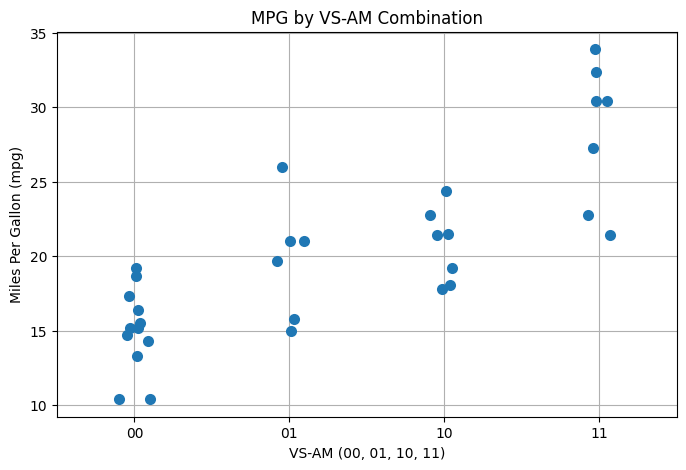

In [30]:
df['group'] = df['vs'].astype(str) + df['transmission'].astype(str)

plt.figure(figsize=(8, 5))
sns.stripplot(x='group', y='mpg', data=df, jitter=True, size=8, order=['00', '01', '10', '11'])

plt.title('MPG by VS-AM Combination')
plt.xlabel('VS-AM (00, 01, 10, 11)')
plt.ylabel('Miles Per Gallon (mpg)')
plt.grid(True)
plt.show()

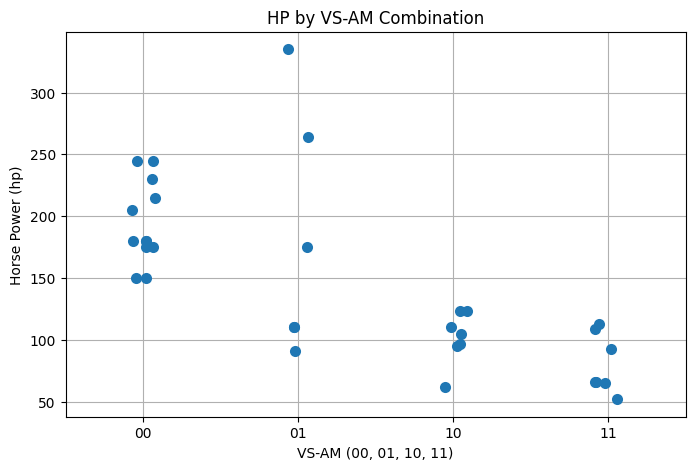

In [31]:
plt.figure(figsize=(8, 5))
sns.stripplot(x='group', y='hp', data=df, jitter=True, size=8, order=['00', '01', '10', '11'])

plt.title('HP by VS-AM Combination')
plt.xlabel('VS-AM (00, 01, 10, 11)')
plt.ylabel('Horse Power (hp)')
plt.grid(True)
plt.show()

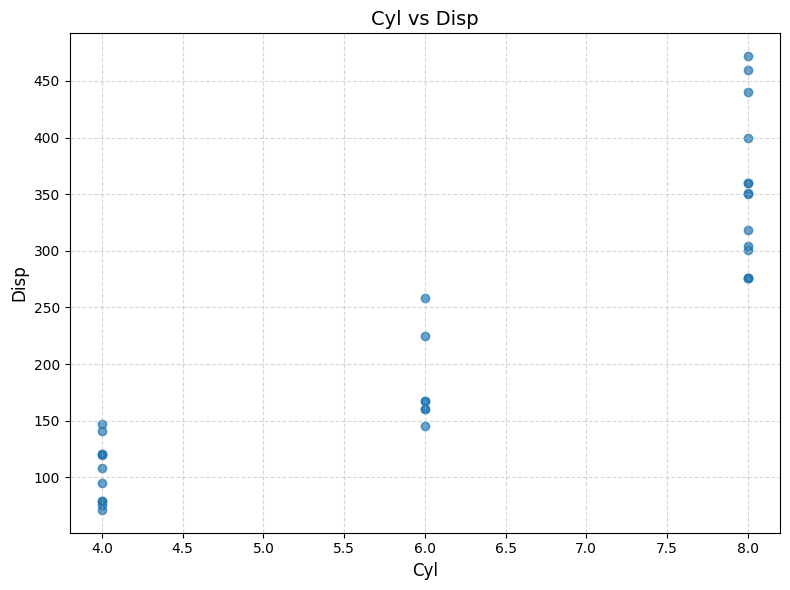

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(df['cyl'], df['disp'], alpha=0.7)

plt.title('Cyl vs Disp', fontsize=14)
plt.xlabel('Cyl', fontsize=12)
plt.ylabel('Disp', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 2. ESG 경영에 기여할 수 있다. 
최근 대부분의 기업이 리스크 관리와 장기적 생존을 위해 ESG 경영을 강조하고 있다. ESG 경영은 단순한 환경 보호를 위한 움직임에서 나아가 기업 경쟁력을 확보할 수 있는 수단이다. 기업 투자, 글로벌 펀드 등이 ESG 점수가 높은 기업에 더 많은 자금을 투자하며, 점수가 낮거나 논란이 있는 기업은 투자 대상에서 제외되기 때문이다. 또한, 법적으로도 ESG 규제를 지키지 않을 시 벌금, 시장 진입 제한 등 불이익이 크다. 이렇듯 ESG는 리스크 관리 측면에서 기업이 필수적으로 고려해야 할 중요한 사안이다.

- 특히 현대/기아차가 진출하는 해외 시장 중 유럽연합과 미국의 경우, 엄격한 CO2 배출 규제를 시행하고 있기 때문에 연비와 마력, 배기량을 철저히 고려해야 한다.
- 아래의 산점도 그래프를 보았을 때, 연비와 배기량간의 강한 음의 상관관계가 존재한다. 즉, 연비가 높을수록 배기량이 적고, 연비가 낮을수록 배기량이 높음을 알 수 있다. 
- 반면, 마력과 배기량의 경우 비선형 관계로 보이며, 마력을 최대화 할 수 있는 최적의 배기량이 존재하는 것으로 보인다.

일례로, 해당 데이터에서는 마력이 최대인 지점의 배기량은 450이지만, 이 경우 연비가 매우 낮다. 
따라서 유럽, 미국 시장의 엄격한 환경 규제를 고려하면, 연비와 배기량을 최적화하는 것이 중요하며, 배기량을 줄여 연비를 개선하면서도 마력을 일정 수준까지 확보하는 균형점을 찾는 것이 가장 중요하다.

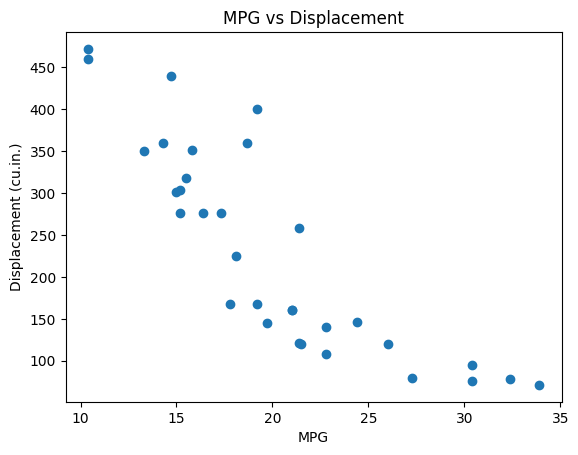

In [25]:
# 연비와 배기량 간의 상관관계를 알아보기 위한 scatter plot

plt.scatter(df["mpg"], df["disp"])
plt.xlabel("MPG")
plt.ylabel("Displacement (cu.in.)")
plt.title("MPG vs Displacement")
plt.show()

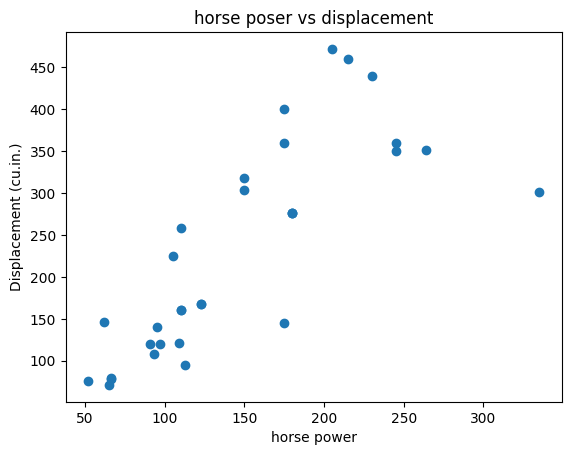

In [26]:
# 마력과 배기량 간의 상관관계를 알아보기 위한 scatter plot

plt.scatter(df["hp"], df["disp"])
plt.xlabel("horse power")
plt.ylabel("Displacement (cu.in.)")
plt.title("horse poser vs displacement")
plt.show()